In [1]:
from rent_entities import *
from rent_compare import *

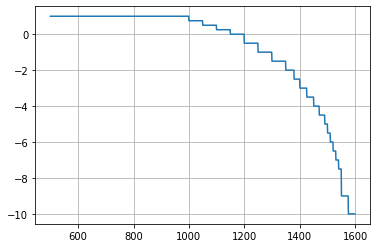

In [2]:
AppartmentEntity._plot_price_sensitive()

In [3]:

oppotunities = [gepflegte2,
                mobschon,
                leopold
                ]

df = app2df(oppotunities)

In [4]:
df

,con,desire_score,id,label,price,pro,size,spec
0,no bacony with EG,4.2,gepflegte2,app,1390,"next to Ubahn; nice layout, next to park; next...",53,1500 nach; 2 Jahre
1,old building,4.3,mobschon,app,1380,"near park; nice layout, next to market;",39,kvr
2,old building,4.1,leopold,app,1510,near park; nice layout; near shangsu; next to ...,55,"chinese, large sofa, small bedroom, easy gabage"


In [5]:
df = df.sort_values(["desire_score"], ascending=False)
df = df.reset_index(drop=True)
df

,con,desire_score,id,label,price,pro,size,spec
0,old building,4.3,mobschon,app,1380,"near park; nice layout, next to market;",39,kvr
1,no bacony with EG,4.2,gepflegte2,app,1390,"next to Ubahn; nice layout, next to park; next...",53,1500 nach; 2 Jahre
2,old building,4.1,leopold,app,1510,near park; nice layout; near shangsu; next to ...,55,"chinese, large sofa, small bedroom, easy gabage"


leopold: 
	pro:near park; nice layout; near shangsu; next to market; nice mobi, nice küche
	con:old building

gepflegte2: 
	pro:next to Ubahn; nice layout, next to park; next to congyu; 
	con:no bacony with EG

mobschon: 
	pro:near park; nice layout, next to market; 
	con:old building



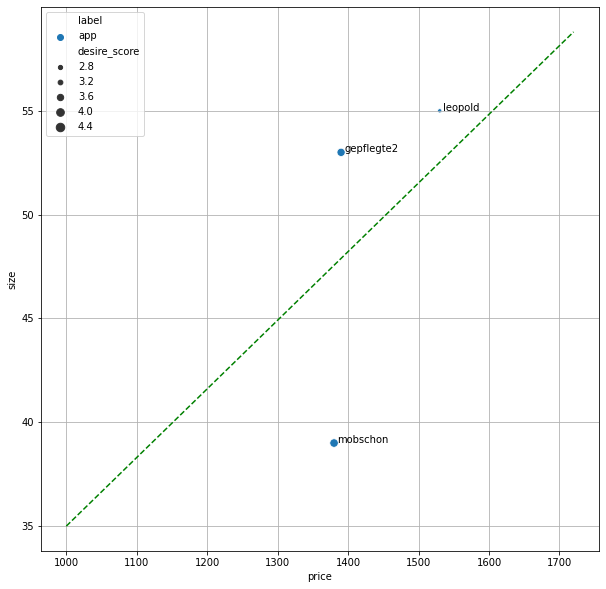

In [5]:
df = df.sort_values(["size"], ascending=False)
df = df.reset_index(drop=True)

plt.figure(figsize=(10, 10))
scatterplot_text("price", "size", "id", hue="label", size="desire_score", data=df)
